<a href="https://colab.research.google.com/github/rizwinsalam/sales-prediction-regress-forest/blob/main/sales_prediction_regress_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/
%ls

Mounted at /content/drive
/content/drive/MyDrive
 11.pptx
 12.pptx
 13.pptx
 14.pptx
 15.pptx
 16.pptx
 17.pptx
 18.pptx
 19.pptx
 1.pptx
 20.pptx
 21.pptx
 22.pptx
 23.pptx
 2.pptx
 3.pptx
 3_Presentations_export.zip
 4.pptx
 5.pptx
 6.pptx
 7.pptx
 8.pptx
 9.pptx
 assignment.ipynb
'assignmnt data 3.csv'
'assignmnt data.csv'
 B612_20180729_120250_683.jpg
 B612_20180808_154050_152.jpg
 B612_20180808_160130_225.jpg
 B612_20180808_160225_165.jpg
 B612_20180808_160653_466.jpg
 B612_20180914_132158_333.jpg
 B612_20180914_132355_861.jpg
 B612_20180914_132554_260.jpg
 B612_20180921_152451_842.jpg
 B612_20180921_152529_316.jpg
 B612_20180921_152856_621.jpg
 B612_20180921_152926_676.jpg
 B612_20180923_160359_044.jpg
 B612_20180925_154614_127.jpg
 B612_20180925_155346_624.jpg
 B612_20180925_155356_657.jpg
 B612_20180925_155427_177.jpg
 B612_20180926_131618_165.jpg
 B612_20181011_113534_999.jpg
 B612_20181011_113811_381.jpg
 B612_20181011_162939_713.jpg
 B612_20181011_163028_616.jpg
 B612_201810

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
null_values = df.isnull().sum()
print(null_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [ ]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
null_values_after_handling = df.isnull().sum()
print(null_values_after_handling)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
null_values_after_handling = df.isnull().sum()
print(null_values_after_handling)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


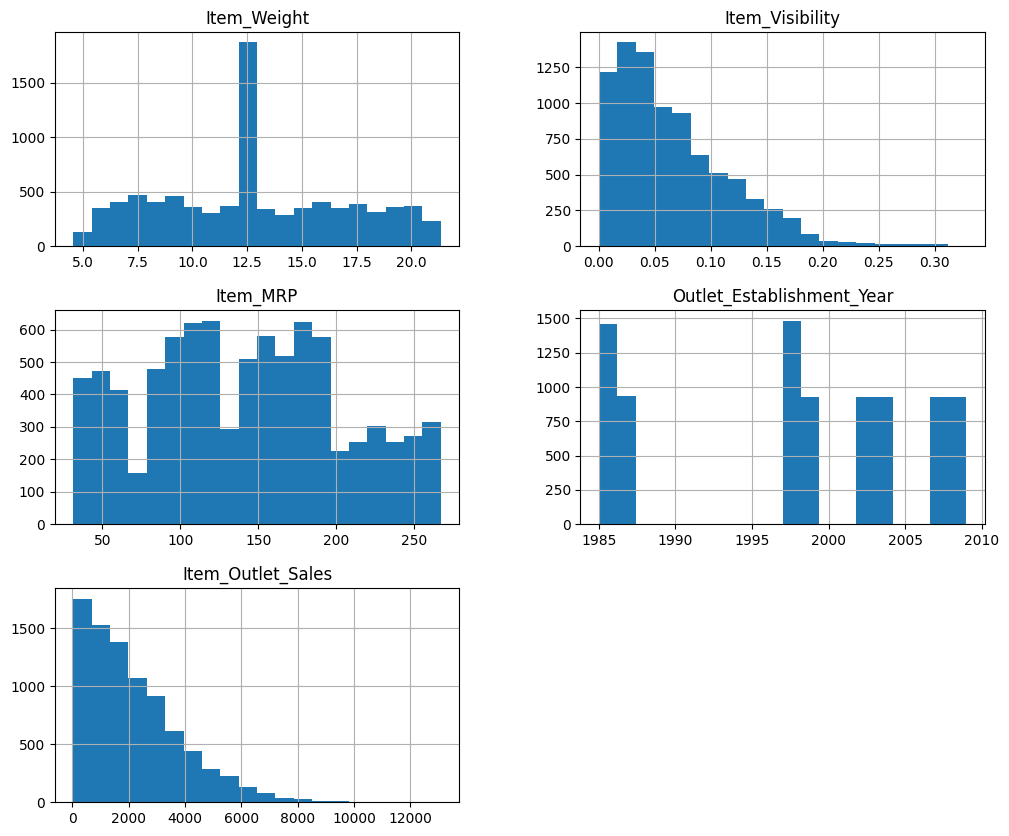

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=20)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

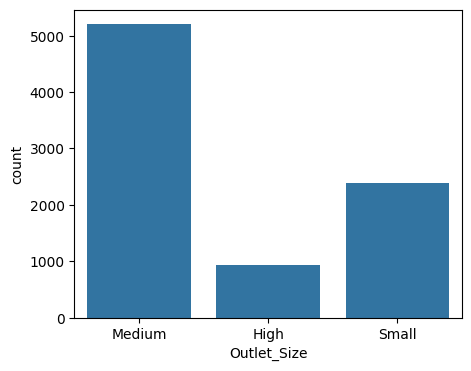

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [ ]:
fat_content_counts = df['Item_Fat_Content'].value_counts()

In [ ]:
Location_Type = df['Outlet_Location_Type'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Item_type_counts = df['Item_Type'].value_counts()

In [ ]:
item_type_counts = df['Item_Type'].value_counts().head(20)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'`]]
y = df['Item_Outlet_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model = LinearRegression()

In [ ]:

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1792623.0638421008
R-squared: 0.3404551853385479


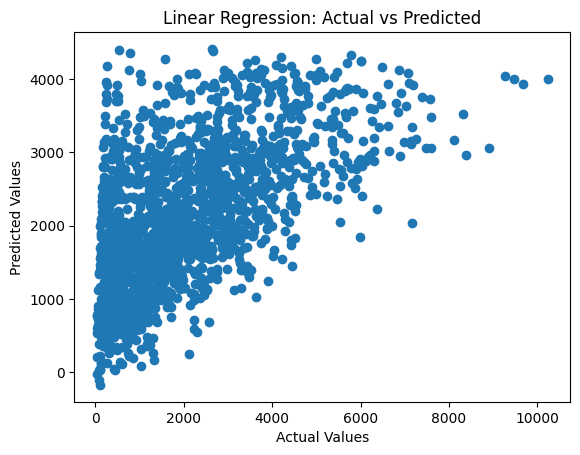

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X = df[['Item_Visibility', 'Item_MRP', 'Item_Visibility']]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1792159.8003129025
R-squared: 0.34062563001521606


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X = pd.get_dummies(df.drop(columns=['Item_Identifier', 'Item_Weight',	'Item_Fat_Content','Outlet_Identifier']))
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 12.411695151693594
R-squared: 0.9999954334687846


In [ ]:
from sklearn.metrics import accuracy_score

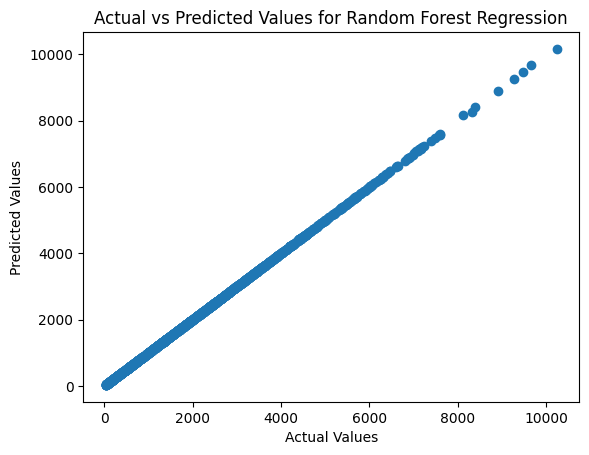

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt